# Stock Growth Comparison – Beginner's Guide with Code Annotations

This guide walks through a Python project that compares the growth rates of two stocks using historical data from Yahoo Finance, linear regression from scikit-learn, and a plot to visualize the trends. Inline notes explain every part for beginners.

HOW TO USE:
1. Run each cell in order.
2. When prompted, enter:
- Stock symbol 1 (e.g., AAPL)
- Stock symbol 2 (e.g., TSLA)
- Start date and end date in the format YYYY-MM-DD
3. The output will display growth rates and a plot comparing both stocks.

##Step 1: Import Libraries

In [26]:
# Importing the necessary libraries

# yfinance is used to fetch historical stock data from Yahoo Finance
import yfinance as yf  # This is the library that helps fetch stock price data.

# numpy is used for numerical operations and array handling
import numpy as np  # NumPy is used for efficient numerical operations on arrays, matrices, and data manipulation.

# pandas is used for data manipulation and analysis (works well with time series data)
import pandas as pd  # Pandas is a powerful tool for working with tabular data and performing data analysis.

# matplotlib.pyplot is used for data visualization (plotting graphs)
import matplotlib.pyplot as plt  # This library helps you create plots, like the stock vs. stock growth graph.

# LinearRegression is used to perform linear regression to model the relationship between stock prices and dates.
from sklearn.linear_model import LinearRegression  # LinearRegression helps us calculate the slope (growth rate) of stock prices over time.

##Step 2: Define Function to Fetch Historical Data

In [27]:
# Defining a function to fetch historical stock data for a given stock symbol

def get_stock_data(symbol, start_date, end_date):
    """
    Fetch historical stock data for the given symbol within the specified date range.
    This function uses the yfinance library to pull the stock data.
    """
    # Download stock data from Yahoo Finance for the given stock symbol and date range
    stock_data = yf.download(symbol, start=start_date, end=end_date)  # yfinance.download pulls historical data

    # We are only interested in the 'Close' prices, so we select that column
    stock_data = stock_data[['Close']]  # Select only the 'Close' column, which contains the stock's closing prices.

    # Return the stock data containing only the 'Close' prices
    return stock_data  # The function returns the 'Close' prices of the stock for the date range provided.

##Step 3: Define Function to Calculate Growth Rate (Slope) Using Linear Regression

In [28]:
# Define a function to calculate the growth rate (slope) of stock data using Linear Regression
def calculate_growth_rate(stock_data):
    """
    Calculate the growth rate (slope) for the given stock data using Linear Regression.
    This function fits a linear regression model to the stock's closing prices
    over time to determine the slope (growth rate).
    """
    # Convert the stock of the stock data (which represents the dates) to a datetime object
    stock_data['Date'] = pd.to_datetime(stock_data.index)  # Convert the DataFrame's index (dates) into datetime

    # Convert the datetime values into ordinal values to be used in regression (ordinal numbers represent dates)
    stock_data['Date_Ordinal'] = stock_data['Date'].map(pd.Timestamp.toordinal)  # Convert dates to ordinals for regression

    # Define 'X' as the ordinal date values for regression (independent variable)
    X = stock_data['Date_Ordinal'].values.reshape(-1, 1)  # Reshape the data for sklearn's linear regression model (2D array)

    # Define 'y' as the 'Close' column (dependent variable)
    y = stock_data['Close'].values  # 'Close' column represents the closing price of the stock

    # Create and fit the Linear Regression model
    model = LinearRegression()  # Instantiate the Linear Regression model from sklearn
    model.fit(X, y)  # Fit the model using the date (X) and the closing prices (y)

    # Extract the slope (growth rate) from the model's coefficient
    slope = model.coef_[0]  # The slope is the first element of the model's coefficient array

    # Return the calculated slope (growth rate)
    return slope  # This is the growth rate (slope) that indicates the rate of change of the stock's price over time

## Step 4: Define Function to Plot Stocks' Data

In [29]:
# Define a function to plot the stocks' data on the same graph for comparison
def plot_data(stock_data, stock2_data, stock_symbol, stock2_symbol):
    """
    Plot the stocks' data on the same graph.
    This function helps visualize the performance of the stocks over time.
    It plots the closing prices of both the stocks over time.
    """
    # Create a new figure for the plot with a specific size
    plt.figure(figsize=(10, 6))  # The figure size is set to 10x6 inches for better readability

    # Plot the stock's closing price with a blue line
    plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Stock', color='blue')  # Stock data in blue

    # Plot the seconf stock's closing price with a red line
    plt.plot(stock2_data.index, stock2_data['Close'], label=f'{stock2_symbol} Stock2', color='red')  # Stock data in red

    # Set the title of the plot to show which stocks are being compared
    plt.title(f'{stock_symbol} vs {stock2_symbol} Growth Comparison')  # Title reflects the stocks' symbols

    # Label the x-axis as 'Date' since the x-axis represents the time dimension
    plt.xlabel('Date')  # X-axis shows the dates for the stocks

    # Label the y-axis as 'Closing Price ($)' since the y-axis represents the closing prices of the stocks
    plt.ylabel('Closing Price ($)')  # Y-axis shows the closing price in USD

    # Display the legend to identify the stocks in the plot
    plt.legend()  # Legend helps distinguish the stock (blue) and the second stock (red)

    # Add a grid to the plot for easier visualization of trends
    plt.grid(True)  # A grid makes the plot easier to read by adding horizontal and vertical lines

    # Display the plot
    plt.show()  # Show the plot on the screen

##Step 5: Define the Main Function to Compare Growth Rates

In [30]:
# Define a function to compare the growth rate (slope) of the stocks
def compare_growth_rates(stock_symbol, stock2_symbol, start_date, end_date):
    """
    Compare the growth rate (slope) of the stocks.
    This function fetches historical stocks' data, calculates their growth rates (slopes),
    and prints the results. It also visualizes the comparison using a plot.
    """
    # Fetch historical data for the stocks using the 'get_stock_data' function
    stock_data = get_stock_data(stock_symbol, start_date, end_date)  # Stock data between the specified start and end dates
    stock2_data = get_stock_data(stock2_symbol, start_date, end_date)  # Second Stock data between the specified start and end dates

    # Calculate the growth rates (slopes) using the 'calculate_growth_rate' function
    stock_growth_rate = calculate_growth_rate(stock_data)  # Growth rate (slope) of the stock
    stock2_growth_rate = calculate_growth_rate(stock2_data)  # Growth rate (slope) of the second stock

    # Print the calculated growth rates (slopes) for the stocks
    print(f'Growth Rate (Slope) of {stock_symbol}: {stock_growth_rate[0]:.4f}')  # Print stock growth rate with 4 decimal places
    print(f'Growth Rate (Slope) of {stock2_symbol}: {stock2_growth_rate[0]:.4f}')  # Print second stock growth rate with 4 decimal places

    # Plot the stocks' data for visualization of their performance over time
    plot_data(stock_data, stock2_data, stock_symbol, stock2_symbol)  # Call the 'plot_data' function to create the comparison plot

## Step 6: User Input and Running the Project

Enter the stock symbol (e.g., AAPL): AAPL
Enter the stock symbol (e.g., TSLA): TSLA
Enter the start date (YYYY-MM-DD): 2020-01-01
Enter the end date (YYYY-MM-DD): 2025-01-01


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Growth Rate (Slope) of AAPL: 0.0731
Growth Rate (Slope) of TSLA: 0.0687


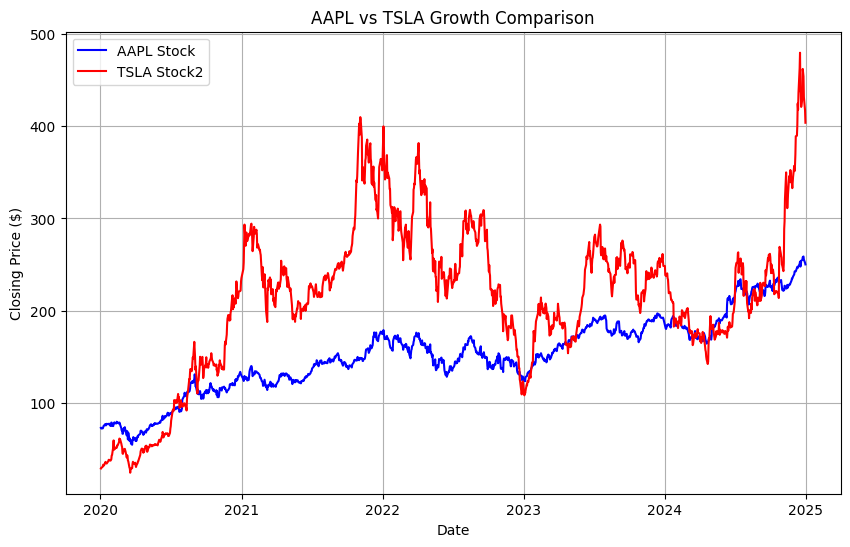

In [31]:
# Main function to run the project
def run_project():
    """
    This function interacts with the user to input the stock symbol, second stock symbol,
    start date, and end date. It then runs the comparison of growth rates between
    the stocks.
    """
    # Ask the user for input (stock symbol, second stock symbol, and date range)
    stock_symbol = input("Enter the stock symbol (e.g., AAPL): ").strip().upper()  # Get stock symbol from user and ensure uppercase
    stock2_symbol = input("Enter the stock symbol (e.g., TSLA): ").strip().upper()  # Get second stock symbol from user and ensure uppercase

    # Clean up and standardize the date format
    start_date = input("Enter the start date (YYYY-MM-DD): ").strip().replace("–", "-").replace("—", "-")  # Remove any invalid dashes and standardize to '-'
    end_date = input("Enter the end date (YYYY-MM-DD): ").strip().replace("–", "-").replace("—", "-")  # Remove any invalid dashes and standardize to '-'

    try:
        # Run the comparison of the stocks
        compare_growth_rates(stock_symbol, stock2_symbol, start_date, end_date)  # Compare growth rates and plot the data
    except Exception as e:
        # Handle errors such as invalid symbols or date ranges
        print(f"\n[ERROR] {e}\nMake sure the symbols and dates are valid.")  # Inform the user of the error and prompt to check inputs

# Run the project
run_project()  # Call the main function to execute the program